## Доклад на тему
# Распределение хи-квадрат

## Подготовил:
Журик Никита Сергеевич, \
4 курс, 6 группа
## Преподаватель:
Пирштук Иван Казимирович, \
канд. физ.-мат. наук

## Определение

Распределение хи-квадрат есть распределение случайной величины $\xi = \sum\limits_{k=1}^n z_k^2$, где $z_k$ - независимые СВ, распределённые по закону стандартного нормального распределения $\mathcal{N}(0,1)$, а $n$ - число степеней свободы распределения.

Случайная величина $\xi$, распределённая по закону хи-квадрат с $k$ степенями свободы, имеет плотность $$p_{\chi_k^2}(x) = \frac{(0.5)^{\frac{k}{2}}}{\Gamma\left(\frac{k}{2}\right)}x^{\frac{k}{2}-1}e^{-\frac{x}{2}}, \ x \geq 0$$.

При этом функция распределения СВ, распределённой по закону хи-квадрат с $k$ степенями свободы, имеет вид $$F_{\chi_k^2}(x) = \frac{\gamma\left(\frac{k}{2}, \frac{x}{2}\right)}{\Gamma\left(\frac{k}{2}\right)}$$

## Свойства

Условие нормировки может быть проверено напрямую с учётом определения гамма-функции:
\begin{align}
\int\limits_{0}^{+\infty} p_{\chi_k^2}(x) dx &= \frac{(0.5)^{\frac{k}{2}}}{\Gamma\left(\frac{k}{2}\right)} \int\limits_{0}^{+\infty} x^{\frac{k}{2}-1}e^{-\frac{x}{2}} dx \\
&= \frac{(0.5)^{\frac{k}{2}}}{\Gamma\left(\frac{k}{2}\right)} \frac{2}{(0.5)^{\frac{k}{2} - 1}} \int\limits_{0}^{+\infty}  \left(\frac{x}{2}\right)^{\frac{k}{2}-1}e^{-\frac{x}{2}} d\left(\frac{x}{2}\right) \\
&= \frac{\Gamma\left(\frac{k}{2}\right)}{\Gamma\left(\frac{k}{2}\right)} = 1
\end{align}

Достаточно просто доказать $\xi \sim \chi_k^2 \implies \mathbb{E}(\xi) = k$:
\begin{align}
\mathbb{E}(\xi) &= \sum\limits_{j=1}^k \mathbb{E}(z_j^2) \\
                &= \frac{k}{\sqrt{2\pi}} \int\limits_{-\infty}^{+\infty} x^2 e^{-\frac{x^2}{2}} dx = [t = x^2] \\
                &= \frac{k}{\sqrt{2\pi}} \int\limits_0^{+\infty} t^{\frac{1}{2}} e^{-\frac{t}{2}} dt \\
                &= \frac{k}{\sqrt{2\pi}} 2\sqrt{2} \int\limits_0^{+\infty} \left(\frac{t}{2}\right)^{\frac{1}{2}} e^{-\frac{t}{2}} d\left(\frac{t}{2}\right) \\
                &= \frac{k}{\sqrt{\pi}} \Gamma\left(\frac{3}{2}\right) \\
                &= \frac{2k}{\sqrt{\pi}} \frac{\sqrt{\pi}}{2} = k
\end{align}

При помощи похожих преобразований можно показать $\mathbb{D}(\xi) = 2k$:
\begin{align}
\mathbb{E}(\xi^2) &= \mathbb{E}\left[\left(\sum\limits_{j=1}^k z_j^2\right)^2\right] = [z_i - i.i.d.] = k\mathbb{E}(z_1^4) + k(k-1) \mathbb{E}[(z_1^2)]^2 \\
                  &= k\mathbb{E}(z_1^4) + k(k-1) \\
                  &= \frac{k}{\sqrt{2\pi}} \int\limits_{-\infty}^{+\infty} x^4 e^{-\frac{x^2}{2}} dx + k^2 - k = [t = x^2] \\
                  &= \frac{k}{\sqrt{2\pi}} \int\limits_0^{+\infty} t^{\frac{3}{2}} e^{-\frac{t}{2}} dt + k^2 - k \\
                  &= \frac{k}{\sqrt{2\pi}} 4\sqrt{2} \int\limits_0^{+\infty} \left(\frac{t}{2}\right)^{\frac{3}{2}} e^{-\frac{t}{2}} d\left(\frac{t}{2}\right) + k^2 - k\\
                  &= \frac{k}{\sqrt{2\pi}} 4\sqrt{2} \Gamma\left(\frac{5}{2}\right) + k^2 - k \\
                  &= \frac{k}{\sqrt{2\pi}} 4\sqrt{2} \frac{3\sqrt{\pi}}{4} + k^2 - k \\
                  &= 3k + k^2 - k = 2k + k^2 \implies \\
\mathbb{D}(\xi) &= 2k + k^2 - k^2 = 2k
\end{align}

## Картиночки

In [4]:
from statmod3 import ChiSquareDistribution

df = 8
n_bins = 100

dist = ChiSquareDistribution(k=df)

sample_size = 10000

samples = dist((sample_size,))

### Функция распределения

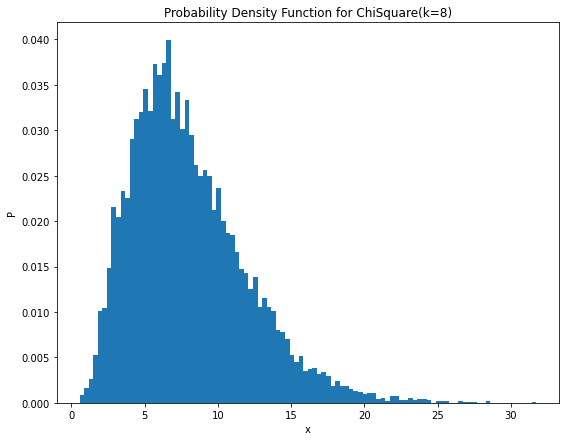

In [10]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(9, 7))
pdf = plt.hist(samples, bins = n_bins, weights=1/sample_size * np.ones_like(samples))
plt.xlabel('x')
plt.ylabel('P')
plt.title(f'Probability Density Function for ChiSquare(k={df})')
plt.show()

### Кумулятивная функция распределения

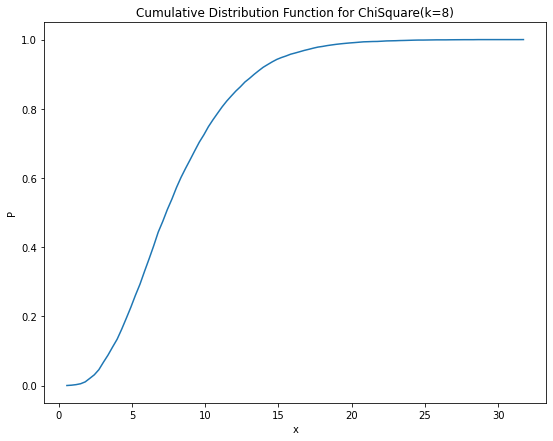

In [14]:
from matplotlib import pyplot as plt

plt.figure(figsize=(9, 7))
plt.plot(pdf[1], [0] + list(pdf[0].cumsum()))
plt.xlabel('x')
plt.ylabel('P')
plt.title(f'Cumulative Distribution Function for ChiSquare(k={df})')
plt.show()

## Применение

Распределение хи-квадрат играет очень большую роль в статистике. Оно обладает множеством полезных и занятных свойств и тесно связано со многими другими распределениями. Например, интересно, что, если $X \sim U(0,1)$, то $-2\log{X} \sim \chi^2(2)$.

Безусловно, очень важным применением данной случайной величины в проверке гипотез является критерий хи-квадрат. Он основан на центральной предельной теореме и определении распределения хи-квадрат.

# Моделирование случайной величины

Случайную величину, распределённую по закону хи-квадрат, достаточно удобно генерировать по определению как сумму квадратов нормально распределённых случайных величин с $\mu = 0$ и $\sigma^2 = 1$. Именно этот метод был использован в третьей лабораторной.

Однако он также требует генератор стандартного нормального распределения. Простейший метод реализовать этот генератор следует из центральной предельной теоремы: достаточно сложить 12 БСВ и вычесть 6 из этой суммы. Полученная СВ будет распределена по закону, близкому к стандартному нормальному.

Однако для большого числа степеней свободы данный метод может оказаться весьма медленным.

Альтернативным способом может служить, например, основанный на бинарном поиске. Так как мы знаем правдивую функцию распределения и она монотонно возрастает, можно генерировать СВ $\eta_i$, распределённые равномерно на отрезке $[0;1]$ и при помощи бинарного поиска по аргументу функции распределения хи-квадрат искать значение функции, обратной к функции распределения, в точках $\eta_i$. Так как вычисление функции распределения хи-квадрат весьма вычислительно затратно и включает в себя вычисление неполной гамма-функции, этот метод также может оказаться весьма неэффективным.